**Se realizan las importaciones**

In [2]:
import pandas as pd
import numpy as np
import datetime
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
siniestros = pd.read_csv('siniestrosEDA.csv')

**KPI 1**

**KPI 1: Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior**

Creación de un df que tenga año / semestre / homicidios semestre actual / homicidios semestre anterior / porcentual diferencia

In [3]:
kpi_1 = siniestros.copy()

In [4]:
kpi_1 = kpi_1[kpi_1['FATAL'] == 1]

Creación de columna para semestre que tomará valores 1 y 2

In [5]:
kpi_1['SEMESTRE'] = (kpi_1['M'] - 1) // 6 + 1

Agrupación por año y semestre, y contabilización de: cantidad de registros = cantidad de víctimas

In [6]:
kpi_1 = kpi_1.groupby(['A', 'SEMESTRE']).size().reset_index(name = 'HOMICIDIOS')

Creación de columna SEMESTRE_ANTERIOR que obtiene el dato de cantidad de HOMICIDIOS del semestre anterior

In [7]:
kpi_1['SEMESTRE_ANTERIOR'] = kpi_1['HOMICIDIOS'].shift(periods=1, fill_value = 0)

La población en CABA según censo de 2022 es de 3120612 habitantes. Asignación de tasa de homicidios cada 100000 habitantes

In [8]:
kpi_1['TASA_HOMICIDIOS'] = (kpi_1['HOMICIDIOS'] / 3120612) * 100000
kpi_1['TASA_SEMESTRE_ANTERIOR'] = (kpi_1['SEMESTRE_ANTERIOR'] / 3120612) * 100000

Creación de columna Variación Porcentual (%) y asignación de valor = ((Nuevo Valor - Valor Antiguo) / Valor Antiguo) * 100

In [9]:
kpi_1['VARIACION'] = (kpi_1['HOMICIDIOS'] - kpi_1['SEMESTRE_ANTERIOR']) / kpi_1['SEMESTRE_ANTERIOR'] * 100
kpi_1['VARIACION'] = (kpi_1['TASA_HOMICIDIOS'] - kpi_1['TASA_SEMESTRE_ANTERIOR']) / kpi_1['TASA_SEMESTRE_ANTERIOR'] * 100

In [10]:
kpi_1

,A,SEMESTRE,HOMICIDIOS,SEMESTRE_ANTERIOR,TASA_HOMICIDIOS,TASA_SEMESTRE_ANTERIOR,VARIACION
0,2016,1,64,0,2.050880,0.000000,inf
1,2016,2,78,64,2.499510,2.050880,21.875000
2,2017,1,65,78,2.082925,2.499510,-16.666667
3,2017,2,70,65,2.243150,2.082925,7.692308
4,2018,1,69,70,2.211105,2.243150,-1.428571
5,2018,2,79,69,2.531555,2.211105,14.492754
6,2019,1,57,79,1.826565,2.531555,-27.848101
7,2019,2,46,57,1.474070,1.826565,-19.298246
8,2020,1,30,46,0.961350,1.474070,-34.782609
9,2020,2,49,30,1.570205,0.961350,63.333333


- Si bien podemos notar que hay una tendencia a la baja, también vemos que hay semestres con subas respecto al semestre anterior.

- Se observa que el semestre 1 del 2020 es el que posee la mayor baja y se explica por la menor circulación de autos debido a las restricciones por la pandemia de Coronavirus.

- En el último semestre analizado se cumple con creces el kpi buscado, ya que se baja en un 23% la tasa de homicidios respecto al semestre anterior

- No es una curva estacionaria, sino una curva con tendencia a la baja

Visualización del KPI en otros años/semestres

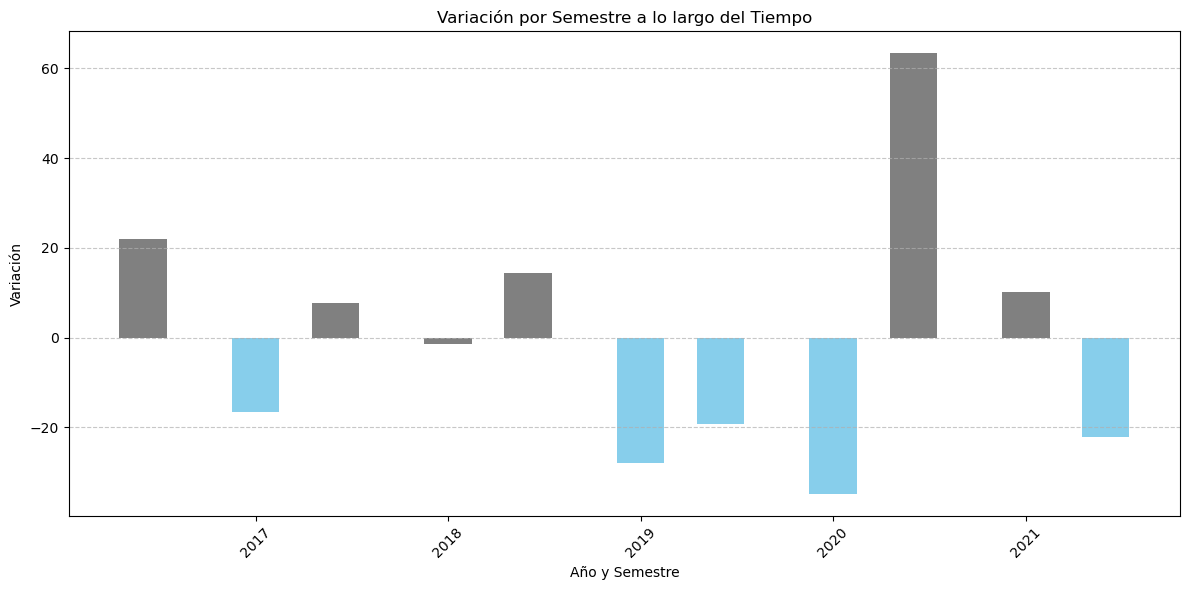

In [11]:
kpi_1['SEMESTRE'] = [6 if a == 2 else a for a in kpi_1['SEMESTRE']]
kpi_1['A'] = pd.to_numeric(kpi_1['A'], errors='coerce')
kpi_1['SEMESTRE'] = pd.to_numeric(kpi_1['SEMESTRE'], errors='coerce')
kpi_1 = kpi_1.dropna(subset=['A', 'SEMESTRE'])
kpi_1['A'] = kpi_1['A'].astype(int)
kpi_1['SEMESTRE'] = kpi_1['SEMESTRE'].astype(int)
kpi_1['FECHA'] = kpi_1['A'].astype(str) + '-' + kpi_1['SEMESTRE'].astype(str) + '-01'
kpi_1['FECHA'] = pd.to_datetime(kpi_1['FECHA'], format='%Y-%m-%d')

plt.figure(figsize=(12, 6))
colores = ['skyblue' if valor < -10 else 'gray' for valor in kpi_1['VARIACION']]
plt.bar(kpi_1['FECHA'], kpi_1['VARIACION'], color=colores, width=90)
plt.xlabel('Año y Semestre')
plt.ylabel('Variación')
plt.title('Variación por Semestre a lo largo del Tiempo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Exportación para futura utilización con Streamlit y Power Bi**

In [12]:
kpi_1.to_csv('kpi_1.csv', index=False)

**KPI 2**

**KPI 2: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior**

Creación de un df que tenga año / homicidios año actual / homicidios año anterior / porcentual diferencia

In [13]:
kpi_2 = siniestros.copy()

In [14]:
kpi_2 = kpi_2[kpi_2['FATAL'] == 1]

Filtrado y selección de registros cuya víctima es motociclista

In [15]:
kpi_2 = kpi_2[kpi_2['VICTIMA'] == 'MOTO']

Agrupación por año, y contabilización de: registros = cantidad de víctimas

In [16]:
kpi_2 = kpi_2.groupby(['A']).size().reset_index(name = 'HOMICIDIOS')

Creación de columna AÑO_ANTERIOR que obtiene el dato de cantidad de HOMICIDIOS del año anterior

In [17]:
kpi_2['AÑO_ANTERIOR'] = kpi_2['HOMICIDIOS'].shift(periods = 1, fill_value = 0)

La población en CABA según censo de 2022 es de 3120612 habitantes. Asignación de tasa de homicidios cada 100000 habitantes

In [18]:
kpi_2['TASA_HOMICIDIOS'] = (kpi_2['HOMICIDIOS']/3120612) * 100000
kpi_2['TASA_AÑO_ANTERIOR'] = (kpi_2['AÑO_ANTERIOR']/3120612) * 100000

Creación de columna Variación Porcentual (%) y asignación de valor = ((Nuevo Valor - Valor Antiguo) / Valor Antiguo) * 100

In [19]:
kpi_2['VARIACION'] = (kpi_2['HOMICIDIOS'] - kpi_2['AÑO_ANTERIOR']) / kpi_2['AÑO_ANTERIOR'] * 100
kpi_2['VARIACION'] = (kpi_2['TASA_HOMICIDIOS'] - kpi_2['TASA_AÑO_ANTERIOR']) / kpi_2['TASA_AÑO_ANTERIOR'] * 100

In [20]:
kpi_2

,A,HOMICIDIOS,AÑO_ANTERIOR,TASA_HOMICIDIOS,TASA_AÑO_ANTERIOR,VARIACION
0,2016,63,0,2.018835,0.000000,inf
1,2017,52,63,1.666340,2.018835,-17.460317
2,2018,57,52,1.826565,1.666340,9.615385
3,2019,49,57,1.570205,1.826565,-14.035088
4,2020,28,49,0.897260,1.570205,-42.857143
5,2021,45,28,1.442025,0.897260,60.714286


- Se observa que el año 2020 es el que posee la mayor baja y se explica por la menor circulación de autos debido a las restricciones por la pandemia de Coronavirus.

- Se observa una tendencia a la baja en accidentes fatales de motociclistas, expetuando el caso atípico de la baja del año 2020 y el consecuente pico del año 2021, aunque sigue siendo menor que el año 2019

- En el último año analizado no se cumple el kpi buscado, ya que sube un 58% la tasa de homicidios respecto al año anterior, pero si vemos otros años que no se vean afectados por el caso atípico del año 2020, vemos que se cumple el KPI (por ejemplo en el año 2017 y 2019 la baja de la tasa de accidentes fatales de motociclistas respecto al año anterior fue sobradamente menor que el 7%)

- No es una curva estacionaria, sino una curva con tendencia a la baja

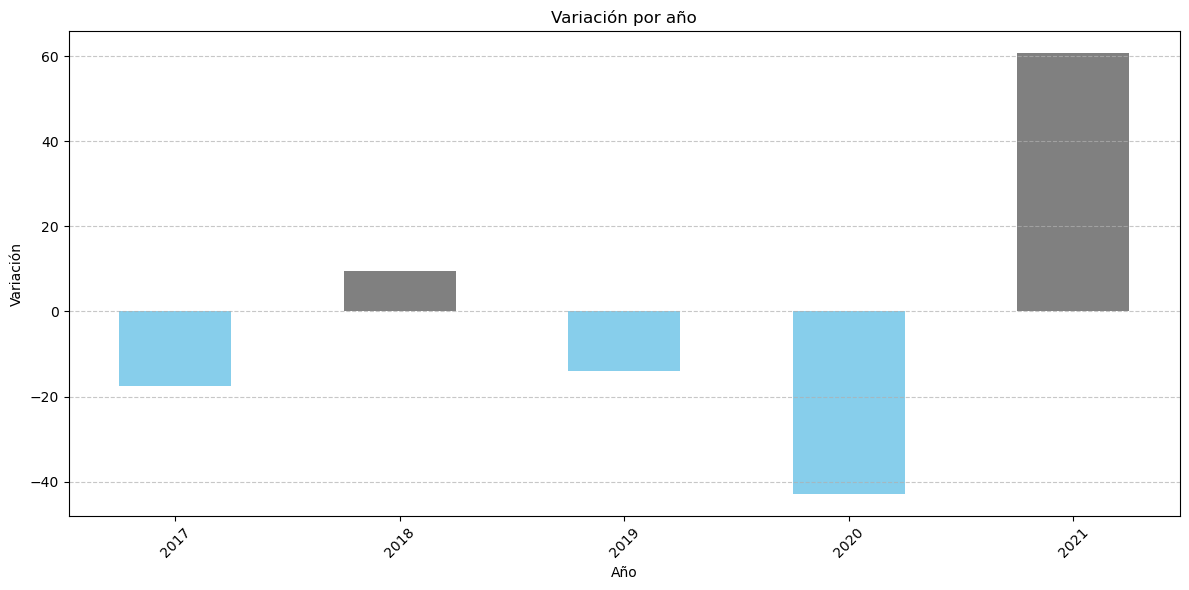

In [21]:
plt.figure(figsize=(12, 6))
colores = ['skyblue' if valor < -7 else 'gray' for valor in kpi_2['VARIACION']]
plt.bar(kpi_2['A'], kpi_2['VARIACION'], color=colores, width=0.5)
plt.xlabel('Año')
plt.ylabel('Variación')
plt.title('Variación por año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Exportación para futura utilización con Streamlit y Power Bi**

In [22]:
kpi_2.to_csv('kpi_2.csv', index=False)

**Otras visualizaciones pertinentes para comprender el comportamiento de los datos**

In [4]:
homicidios = siniestros[siniestros['FATAL']==1]

In [5]:
homicidios

,ID,FECHA,A,M,D,H,COMUNA,LONGITUD,LATITUD,TIPO_CALLE,ACUSADO,VICTIMA,FATAL,DIA_SEMANA
0,2016-0001,2016-01-01,2016,1,1,4,8,-58.475340,-34.687570,AVENIDA,AUTO,MOTO,1,Viernes
1,2016-0002,2016-01-02,2016,1,2,1,9,-58.508775,-34.669777,GRAL PAZ,PASAJEROS,AUTO,1,Sábado
2,2016-0003,2016-01-03,2016,1,3,7,1,-58.390403,-34.631894,AVENIDA,AUTO,MOTO,1,Domingo
3,2016-0004,2016-01-10,2016,1,10,0,8,-58.465039,-34.680930,AVENIDA,SD,MOTO,1,Domingo
4,2016-0005,2016-01-21,2016,1,21,5,1,-58.387183,-34.622466,AVENIDA,PASAJEROS,MOTO,1,Jueves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2021-0092,2021-12-12,2021,12,12,6,3,-58.405969,-34.610120,AVENIDA,AUTO,PEATON,1,Domingo
699,2021-0093,2021-12-13,2021,12,13,17,7,-58.433538,-34.645616,AVENIDA,AUTO,MOTO,1,Lunes
700,2021-0094,2021-12-20,2021,12,20,1,9,-58.467398,-34.651178,AUTOPISTA,AUTO,MOTO,1,Lunes
701,2021-0095,2021-12-30,2021,12,30,0,11,-58.472934,-34.619847,AVENIDA,CARGAS,MOTO,1,Jueves


**Cantidad de muertes según horario (gráfico de barras)**

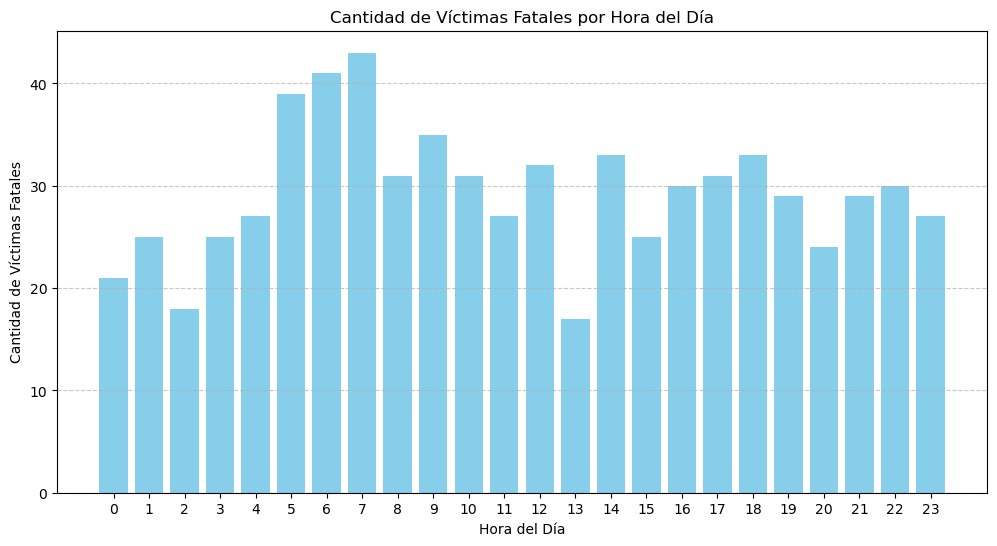

In [6]:
victimas_por_hora = homicidios['H'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_hora.index, victimas_por_hora.values, color='skyblue')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Víctimas Fatales')
plt.title('Cantidad de Víctimas Fatales por Hora del Día')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

**Cantidad de muertes según el mes (gráfico de barra)**

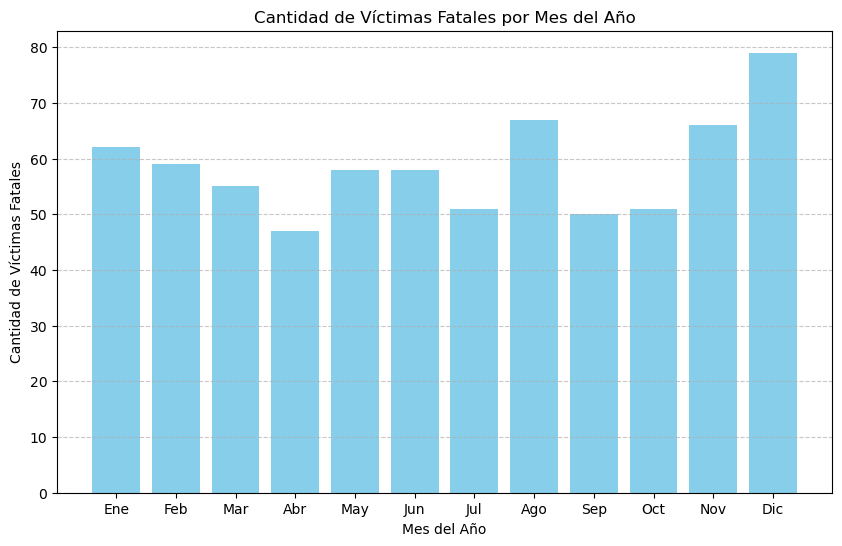

In [7]:
victimas_por_mes = homicidios['M'].value_counts().sort_index()
nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_mes.index, victimas_por_mes.values, color='skyblue')
plt.xlabel('Mes del Año')
plt.ylabel('Cantidad de Víctimas Fatales')
plt.title('Cantidad de Víctimas Fatales por Mes del Año')
plt.xticks(victimas_por_mes.index, nombres_meses)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de muertes según día de la semana (gráfico de barra)**

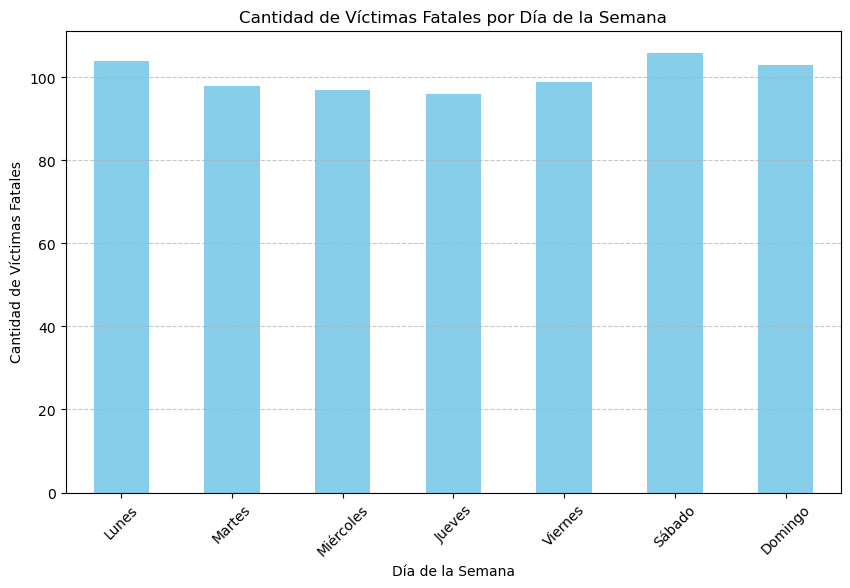

In [8]:
victimas_por_dia_semana = homicidios['DIA_SEMANA'].value_counts().reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.figure(figsize=(10, 6))
victimas_por_dia_semana.plot(kind='bar', color='skyblue')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Víctimas Fatales')
plt.title('Cantidad de Víctimas Fatales por Día de la Semana')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de muertes por año**

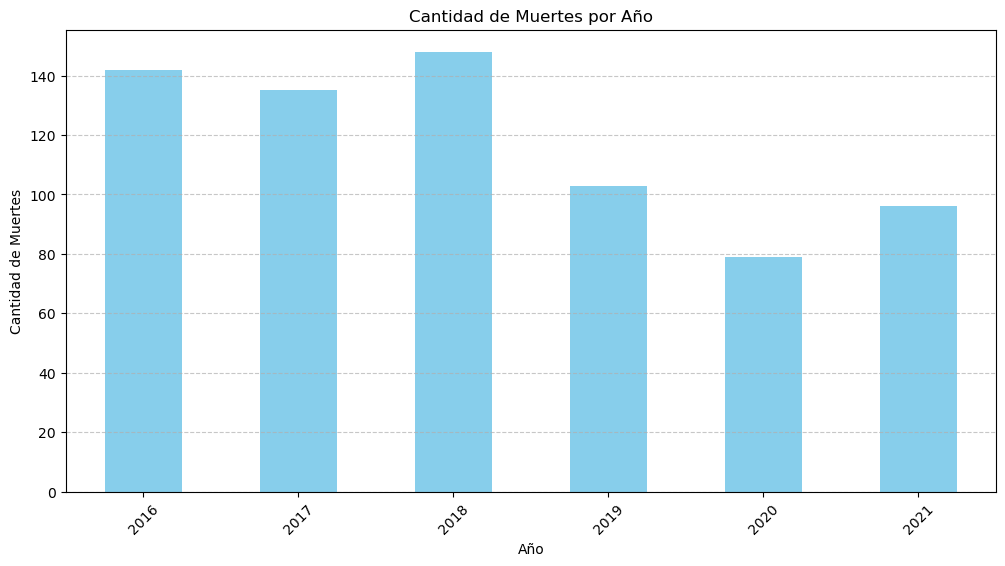

In [9]:
plt.figure(figsize=(12, 6))
homicidios['A'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Año')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de muertes por tipo de calle**

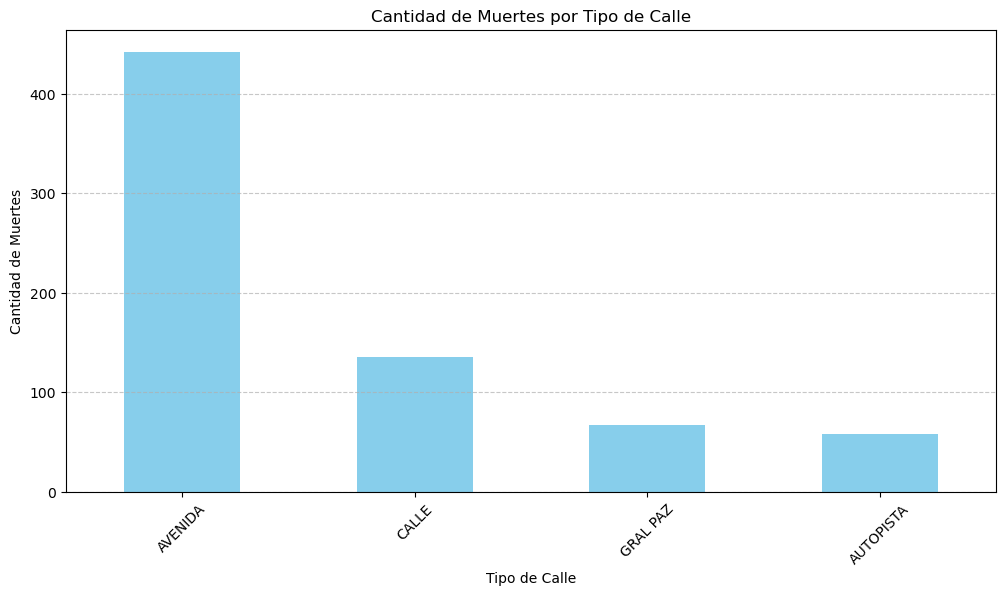

In [10]:
plt.figure(figsize=(12, 6))
homicidios['TIPO_CALLE'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Tipo de Calle')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de muertes por tipo de acusado**

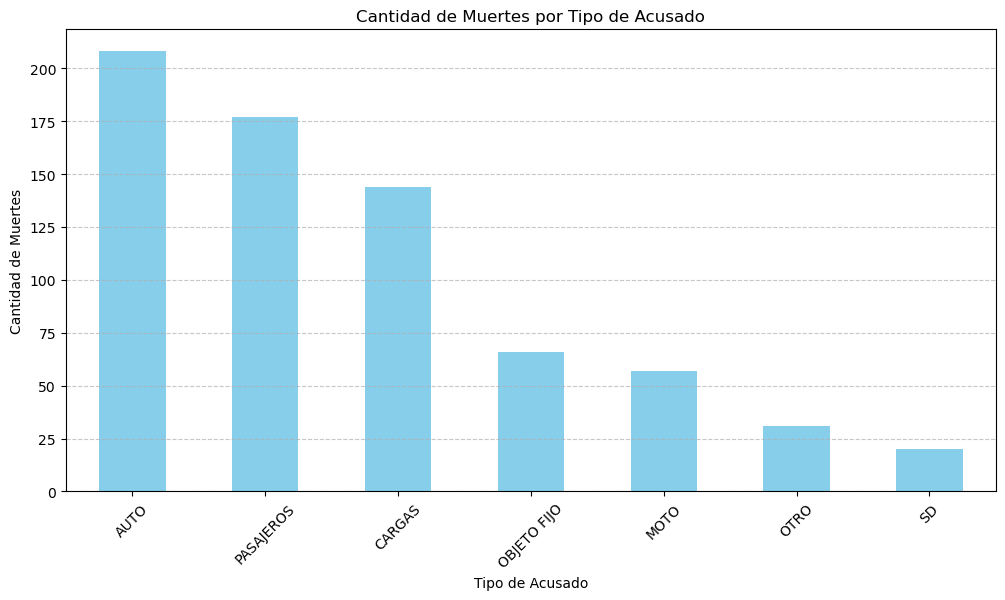

In [11]:
plt.figure(figsize=(12, 6))
homicidios['ACUSADO'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Acusado')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Tipo de Acusado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de Lesiones por acusado**

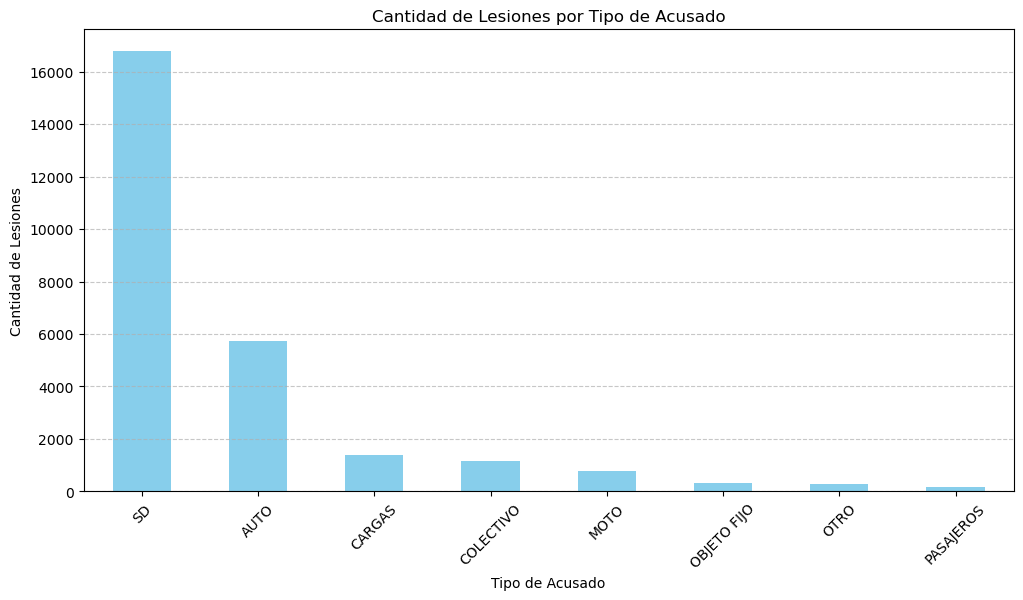

In [12]:
plt.figure(figsize=(12, 6))
siniestros['ACUSADO'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Acusado')
plt.ylabel('Cantidad de Lesiones')
plt.title('Cantidad de Lesiones por Tipo de Acusado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de muertes por tipo de víctima**

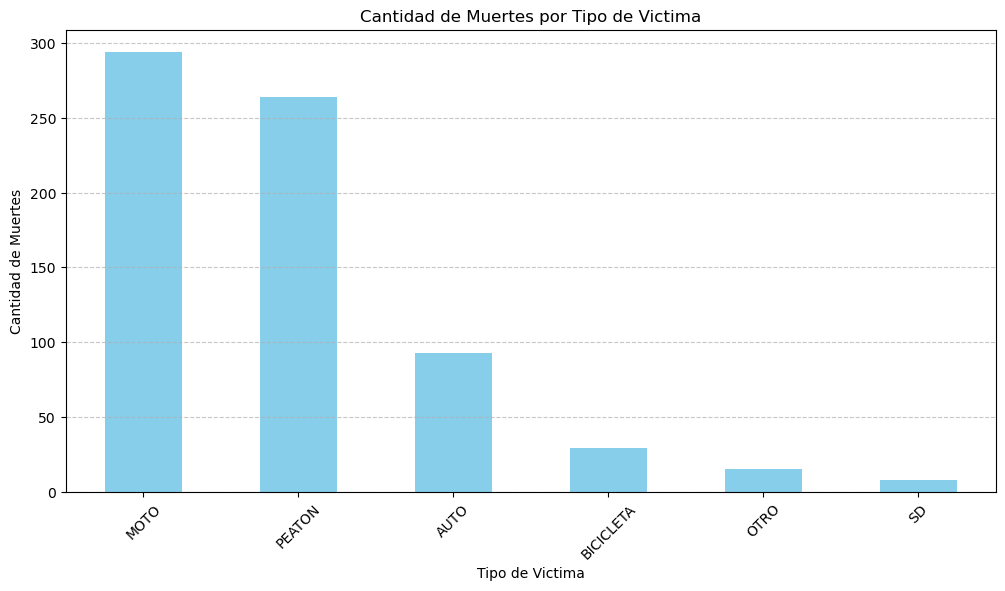

In [13]:
plt.figure(figsize=(12, 6))
homicidios['VICTIMA'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Victima')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Tipo de Victima')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de Lesiones por víctima**

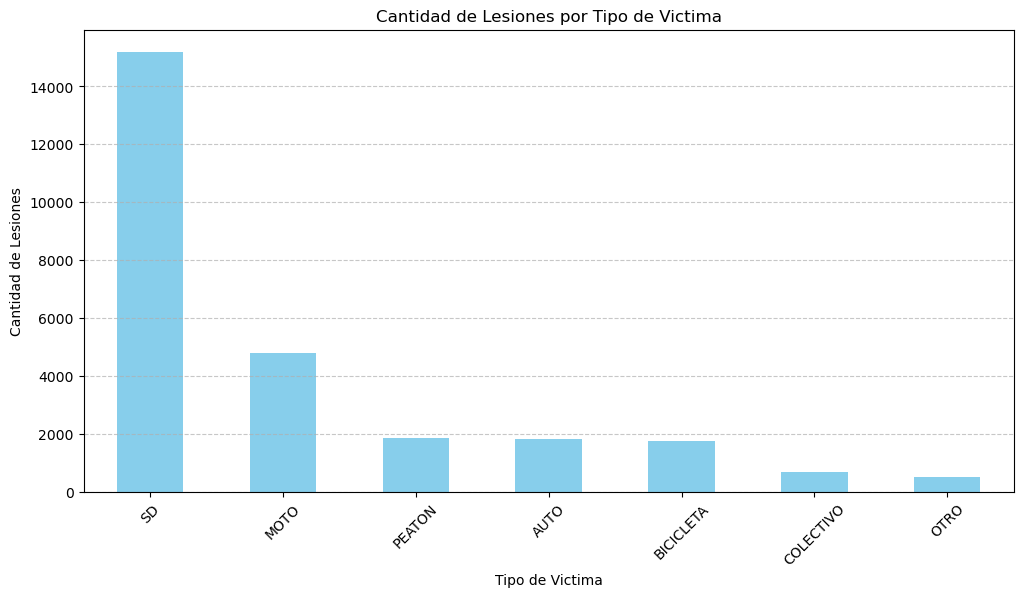

In [14]:
plt.figure(figsize=(12, 6))
siniestros['VICTIMA'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Victima')
plt.ylabel('Cantidad de Lesiones')
plt.title('Cantidad de Lesiones por Tipo de Victima')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de muertes por comuna**

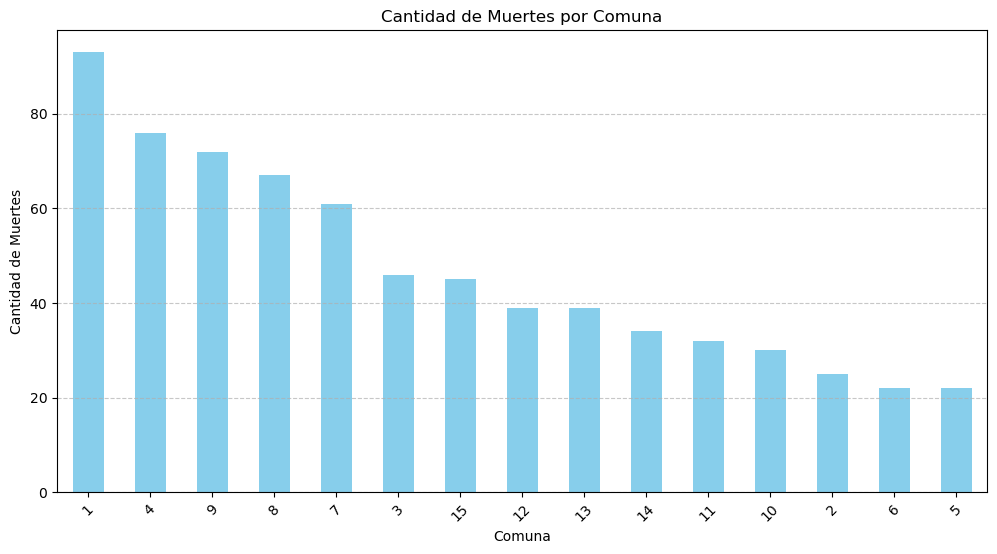

In [15]:
plt.figure(figsize=(12, 6))
homicidios['COMUNA'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Comuna')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Cantidad de muertes por mes (gráfico de lineas)**

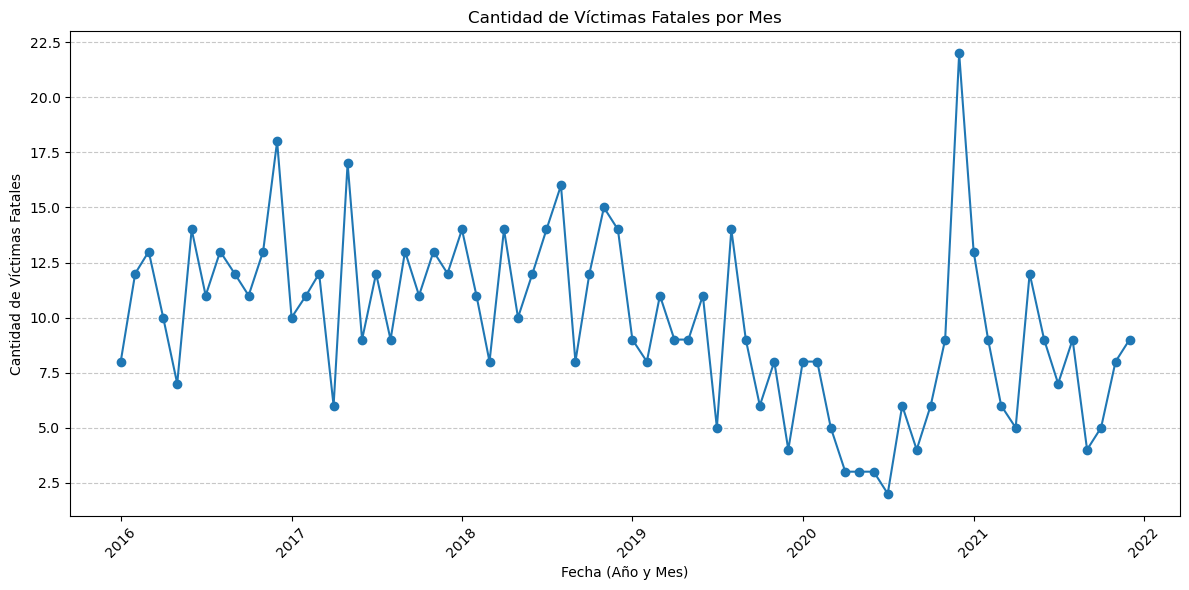

In [16]:
victimas_por_mes = homicidios.groupby(['A', 'M'])['FATAL'].sum().reset_index()
victimas_por_mes['FECHA'] = pd.to_datetime(victimas_por_mes['A'].astype(str) + '-' + victimas_por_mes['M'].astype(str) + '-01')
victimas_por_mes = victimas_por_mes.sort_values(by='FECHA')
plt.figure(figsize=(12, 6))
plt.plot(victimas_por_mes['FECHA'], victimas_por_mes['FATAL'], marker='o', linestyle='-')
plt.xlabel('Fecha (Año y Mes)')
plt.ylabel('Cantidad de Víctimas Fatales')
plt.title('Cantidad de Víctimas Fatales por Mes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Cantidad de muertes por mes (gráfico de barras)**

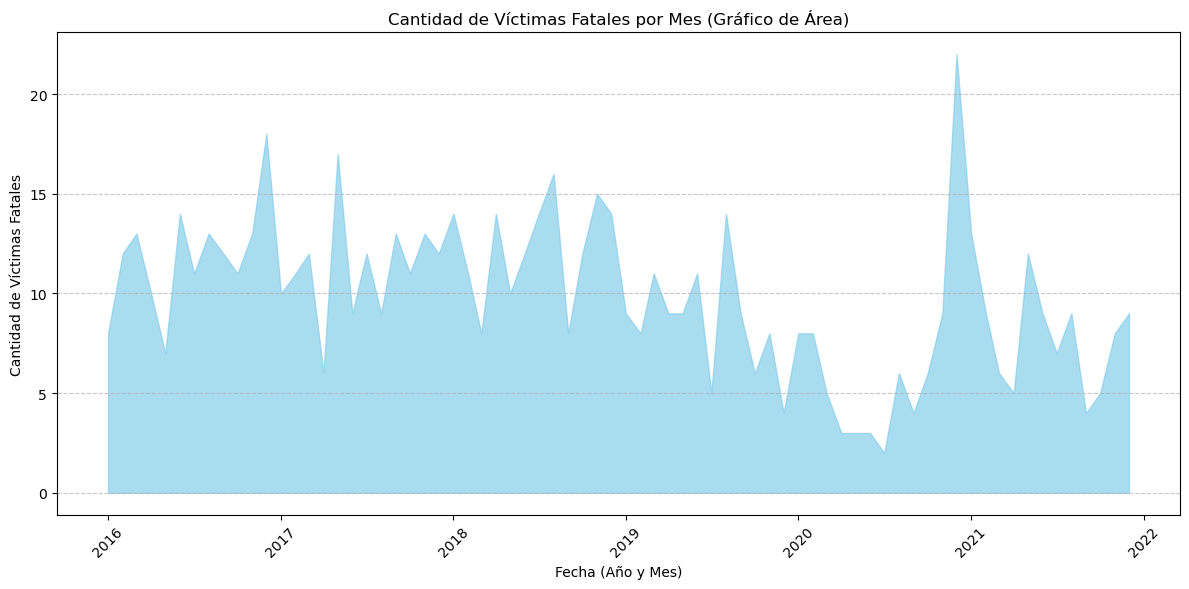

In [17]:
plt.figure(figsize=(12, 6))
plt.fill_between(victimas_por_mes['FECHA'], victimas_por_mes['FATAL'], color='skyblue', alpha=0.7)
plt.xlabel('Fecha (Año y Mes)')
plt.ylabel('Cantidad de Víctimas Fatales')
plt.title('Cantidad de Víctimas Fatales por Mes (Gráfico de Área)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Muertes según hora, según día de la semana**

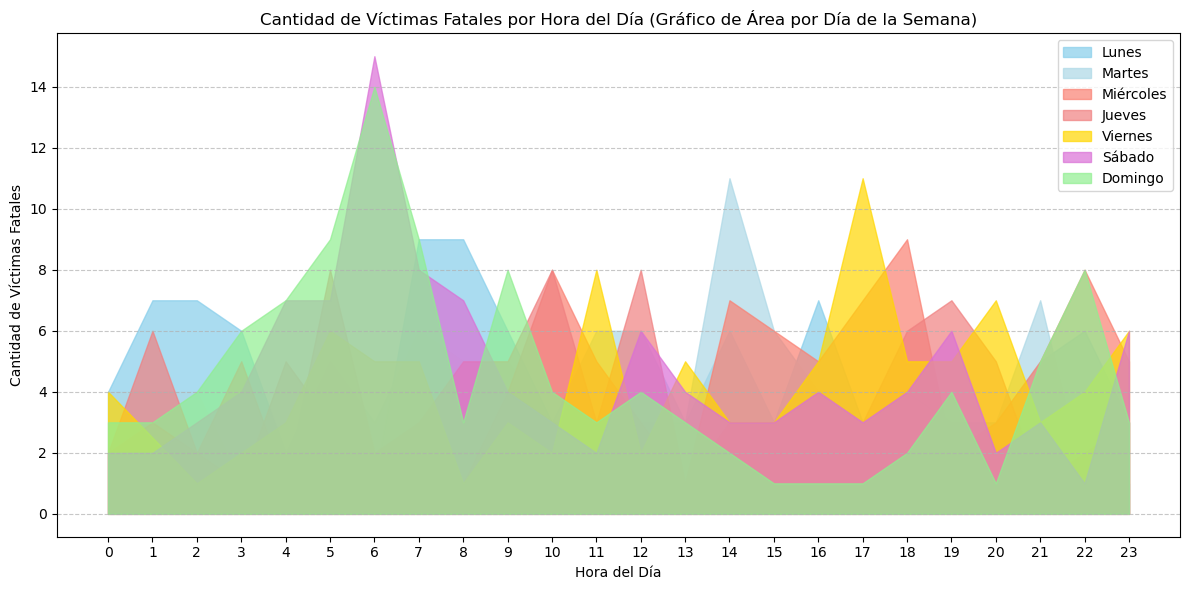

In [18]:
colores_por_dia = {
    'Lunes': 'skyblue',
    'Martes': 'lightblue',
    'Miércoles': 'salmon',
    'Jueves': 'lightcoral',
    'Viernes': 'gold',
    'Sábado': 'orchid',
    'Domingo': 'lightgreen'
}

plt.figure(figsize=(12, 6))
for dia, color in colores_por_dia.items():
    filtro = homicidios['DIA_SEMANA'] == dia
    victimas_por_hora = homicidios[filtro].groupby('H')['FATAL'].sum()
    plt.fill_between(victimas_por_hora.index, victimas_por_hora.values, color=color, alpha=0.7, label=dia)

plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Víctimas Fatales')
plt.title('Cantidad de Víctimas Fatales por Hora del Día (Gráfico de Área por Día de la Semana)')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Cantidad de accidentes con lesiones según horario**

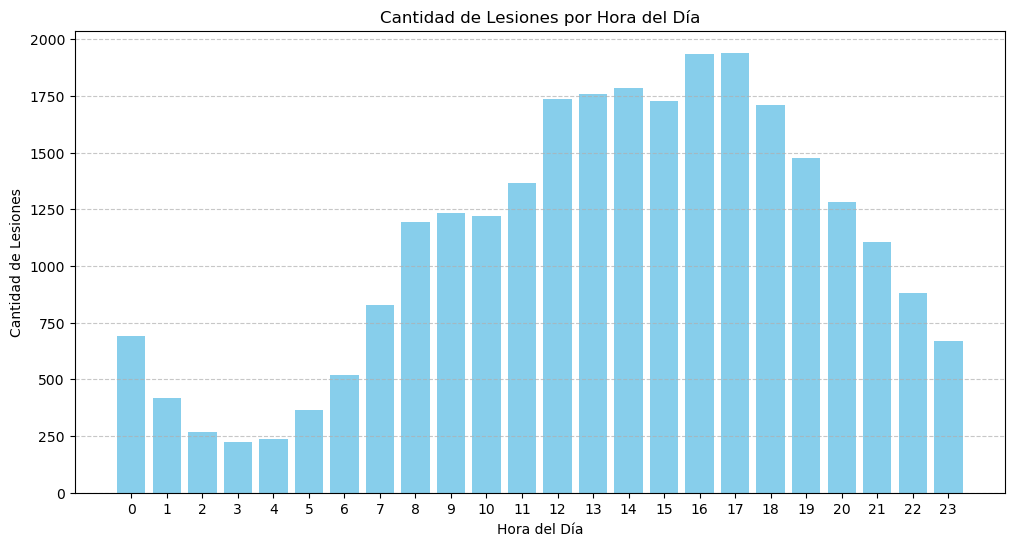

In [19]:
victimas_por_hora = siniestros['H'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_hora.index, victimas_por_hora.values, color='skyblue')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Lesiones')
plt.title('Cantidad de Lesiones por Hora del Día')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

**Mapa de accidentes fatales**

In [20]:
latitudes = homicidios.LATITUD.tolist()
longitudes = homicidios.LONGITUD.tolist()

mapa = folium.Map(location=[sum(latitudes)/len(latitudes), sum(longitudes)/len(longitudes)], zoom_start=12)

for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(mapa)

mapa